# Titanic - Exploratory Data Analysis - 05

## Introduction

The purpose of this analysis is to predict if a passenger survived the Titanic disaster.

On April 15, 1912, ran into an iceberg killing 1,502 of 2,224 passengers and crew.

Of these people aboard the Titanic, we are provided with data on 1,309 passengers -- 891 in the training set and 418 in the test set.

Here are some questions we should try to answer during our analysis that could help us understand what a predictive model could look like:
 * What was the survival rate of women versus men?
 * What was the survival rate of children versus adults?
 * Did passenger socio-economic status play a role in survival?
 * How does age affect a passengers survival?
    * What if age is compounded with sex?
    * Or with class?

### Data Dictionary

  * Categorical
    * Sex: Sex of passenger
        * male
        * female 
    * Ticket: Ticket number of passenger
    * Cabin: Room where passenger stayed
        * Compound field where first alpha character designated the section of the ship and the following numbers was the room number
        * Essentially, it's the location of a passenger's room on the ship
    * Embarked: Port of Embarkation
        * C = Cherbourg
        * Q = Queenstown
        * S = Southampton
  * Numerical
    * Survival: Integer boolean indicating if passenger survived - target variable
        * 0 = No
        * 1 = Yes
    * PassengerId : Unique integer value corresponding to each passenger
    * Pclass: Ticket class - proxy for socio-economic status
        * 1 = 1st (upper)
        * 2 = 2nd (middle)
        * 3 = 3rd (lower)
    * Age: Age in years - fractional if less than 1
        * If the age is estimated, it is in the form of xx.5
    * SibSp: \# of siblings / spouses aboard the Titanic
        * Sibling = brother, sister, stepbrother, stepsister
        * Spouse = husband, wife (mistresses and fiances were ignored)
    * Parch: \# of parents / children aboard the Titanic
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
        * Some children travelled only with a nanny, therefore Parch=0 for them
    * Fare: Passenger fare

In [1]:
# Import libraries
import os
import sys

import scipy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings

sys.path.append('Titanic\\Code\\DataPrep')
from helpers import *

warnings.filterwarnings('ignore')
np.random.seed(17)
%matplotlib inline

## 1. Read and summarize the data

In [2]:
df_train = Titanic(name='train').data

In [3]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


#### Initial observations
 * The column 'Cabin' and 'Age' have missing values.
 * The 'Name' column also includes the title of a passenger.
    * New question: Is there a pattern of survival rate for a given or group of titles?
 * A ticket does not seem to have any pattern or hidden features.
    * It is likely we will not use this for our current or final analysis.
    * Recommendation is to remove from dataset in future pipeline.

In [6]:
print("There are %d rows and %d columns in the dataset.\n" % df_train.shape)
print("The columns of the dataset are: %s\n" % ', '.join(df_train.columns))
df_train.dtypes

There are 891 rows and 11 columns in the dataset.

The columns of the dataset are: Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked



Survived       int32
Pclass         int32
Name          object
Sex         category
Age          float64
SibSp          int32
Parch          int32
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

## 2. Identify data cleanup needed, action taken, and explanation.
 * Duplicate records
 * Unnecessary columns
 * Missing data
 * Data format

### 2.1 Duplicate records

In [7]:
print("There are %d duplicate records." % df_train.duplicated().sum())

There are 0 duplicate records.


### 2.2 Unnecessary columns

As stated above, there is no discernable pattern between values of 'Ticket'. Granted a deep analysis may be warranted, but on the outset it doesn't appear to have any value in determining the survival of a given passenger. Therefore, we will drop the 'Ticket' column.

In [8]:
df_train_cleaned = df_train.drop(['Ticket'], axis=1)
df_train_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### 2.3 Missing data

In [9]:
# Ratio of missing data
round(df_train_cleaned.isnull().sum()/len(df_train_cleaned)*100, 2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [10]:
# Count of missing data
df_train_cleaned.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

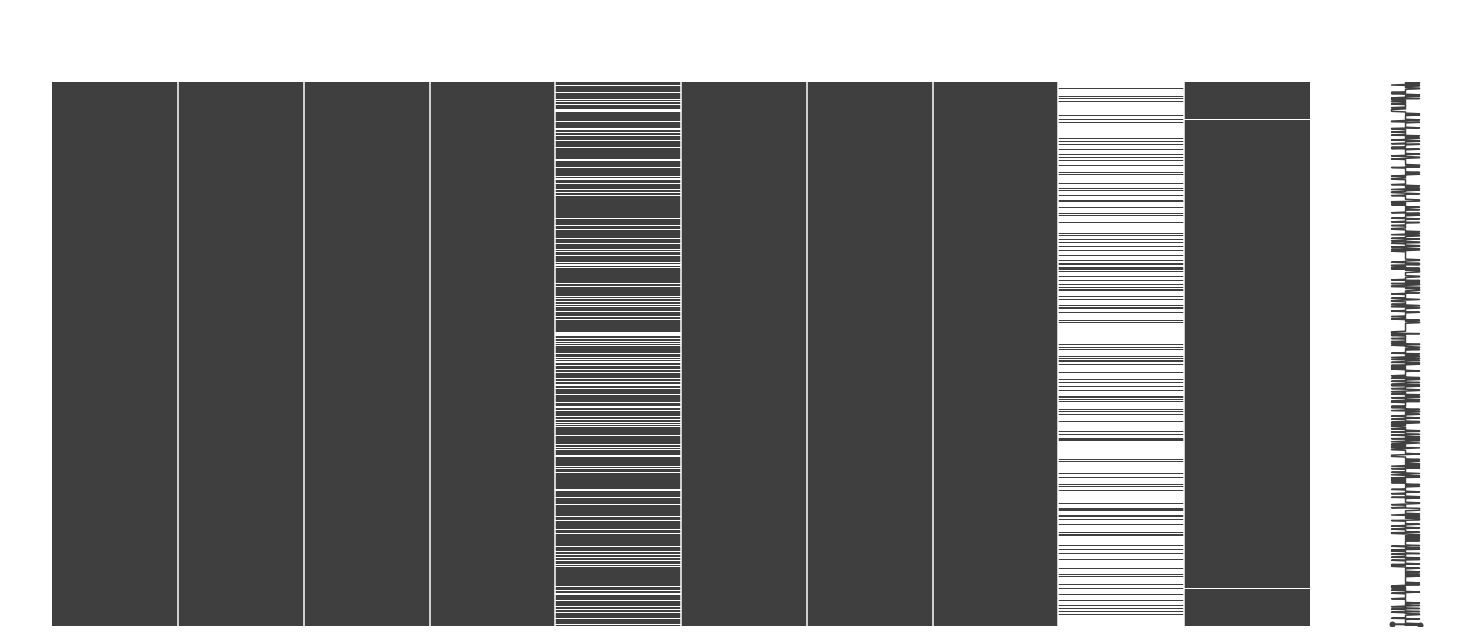

In [11]:
# Plot of missing data
msno.matrix(df_train_cleaned)

For each of 'Age', 'Cabin', and 'Embarked', which are MCAR, MAR, or MNAR?
 * MCAR - Missing Completely at Random
    * When the probability of missing data on a variable is unrelated to any other measured variable and is unrelated to the variable with missing values itself.
         * Little's MCAR Test (abbreviated)
            1. Calculate the mean of each column with missing data.
            2. Calculate the mean of each column without missing data.
            3. If a majority of the columns have same/similar means, then it is LIKELY the data is MCAR.
         * We will perform a t-test on mean survival ('Survived') before and after removing the records with missing values.
 * MAR - Missing at Random
    * When the probability of missing data on a variable is related to some other measured variable in the model, but notto the value of the variable with missing values itself.
         * For example, when data are missing on IQ for a given threshold of age (i.e. children don't have an IQ score in the survey).
 * MNAR - Missing not at Random
    * When the missing values on a variable are related to the values of that variable itself, even after controlling for other variables.
         * For example, when data are missing on IQ and only the people with low IQ values have missing observations for this variable.

In [12]:
# Import t-test function
from scipy.stats import ttest_ind

average_survival = df_train_cleaned['Survived'].mean()
missing_columns = ['Age', 'Cabin', 'Embarked']
alpha = 0.05
for miss_col in missing_columns:
    print(miss_col)
    tmp_mean_without = df_train_cleaned.loc[
        ~df_train_cleaned[miss_col].isnull()
    ]['Survived'].mean()
    print("\tAverage survival with missing: %.5f" % average_survival)
    print("\tAverage survival without missing: %.5f" % tmp_mean_without)
    t_stat, p_value = ttest_ind(
        a=df_train_cleaned['Survived'],
        b=df_train_cleaned.loc[~df_train_cleaned[miss_col].isnull()]['Survived']
    )
    print('\tt-statistic: %.5f; p-value: %.5f' % (t_stat, p_value))
    
    if p_value > alpha:
        print(
            "\tFail to reject null hypothesis of equal means,\n" \
            "\ttherefore assume equal means across samples.\n"
        )
    else:
        print(
            "\tReject null hypothesis of equal means,\n" \
            "\ttherefore assume different means across samples.\n"
        )

Age
	Average survival with missing: 0.38384
	Average survival without missing: 0.40616
	t-statistic: -0.90934; p-value: 0.36331
	Fail to reject null hypothesis of equal means,
	therefore assume equal means across samples.

Cabin
	Average survival with missing: 0.38384
	Average survival without missing: 0.66667
	t-statistic: -7.52850; p-value: 0.00000
	Reject null hypothesis of equal means,
	therefore assume different means across samples.

Embarked
	Average survival with missing: 0.38384
	Average survival without missing: 0.38245
	t-statistic: 0.06012; p-value: 0.95207
	Fail to reject null hypothesis of equal means,
	therefore assume equal means across samples.



We will move forward with our analysis under the assumption that 'Age' and 'Embarked' are both MCAR. Therefore, we can be relatively confident that we can use some sort of imputation strategy for these columns.

However, further analysis will be required to determine the type of missingness exhibited by 'Cabin'. For now, let's just drop it since it has an overwhelming number of missing values and any kind of imputation just doesn't seem feasible.

Due to the overwhelming number of missing data present in the 'Cabin' feature, we will make a note to drop it later in our analysis.

## 3. Review descriptive statistics and make note of special values.
 * Special values may lead to new questions related to target variable.

### 3.1 What was the survival rate of women versus men?

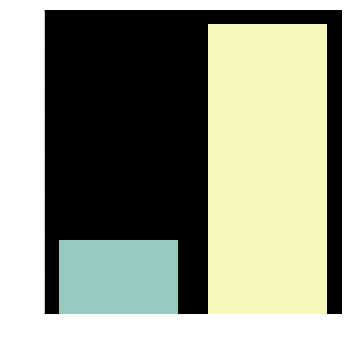

In [57]:
sns.catplot(x="Sex", y="Survived", data=df_train_cleaned, kind='bar', orient='v', ci=None)
plt.show()

The plot above shows women aboard the Titanic had a higher survival rate than men.

### 3.2 What was the survival rate of children versus adults?

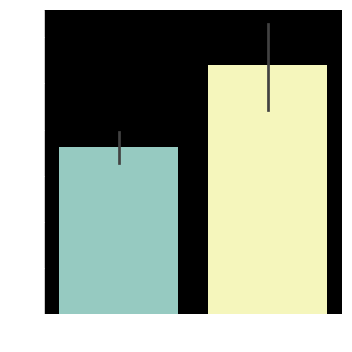

In [59]:
df_train_cleaned['Child'] = 0
df_train_cleaned.loc[df_train_cleaned['Age']<18, 'Child'] = 1

sns.catplot(x="Child", y="Survived", data=df_train_cleaned, kind='bar', orient='v')
plt.show()

There doesn't appear to be as much of a disparity here as we saw previously with survival rates of men and women.

What would these surival rates look like if we encode sex and the child flag?

### 3.5 What was surival rate of sex encoded with a child flag?

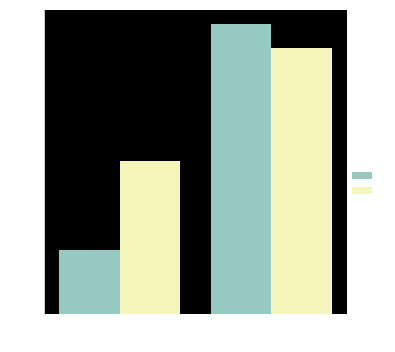

In [60]:
sns.catplot(x="Sex", y="Survived", hue="Child",data=df_train_cleaned, kind='bar', orient='v', ci=None)
plt.show()